Quick investigation of a Lorenz attractor and its correlation dimension

In [99]:
import numpy as np
import pandas as pd

from scipy import integrate

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

In [100]:
# Define Lorenz attractor parameters
sigma = 10.0
beta = 8.0/3.0
rho = 28.0

# Derivative function

def dX_dt(X, t=0):
    """Returns derivative vector"""
    return np.array([sigma*(X[1] - X[0]),
                     X[0]*(rho - X[2]) - X[1],
                     X[0]*X[1] - beta*X[2]])

In [101]:
nPoints = 100000
tmin = 0.0
tmax = 100.0

# Define time axis
t = np.linspace(tmin,tmax,nPoints)

# Initial condition
X0 = np.array([10,5,3])
X0 = np.random.random(3)

# Integrate derivative to obtain trajectory in phase space
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']

'Integration successful.'

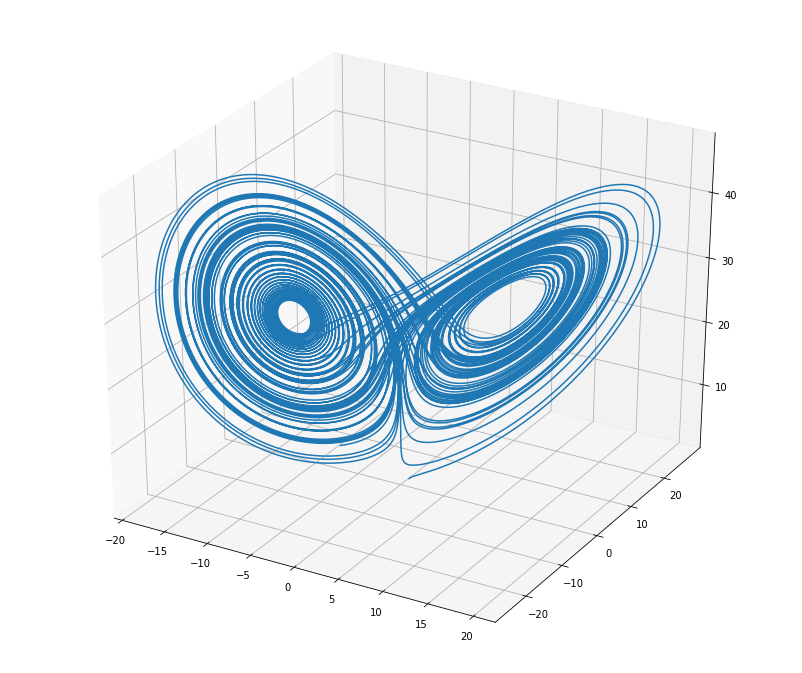

In [102]:
# Plot the output
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs=X[:,0],ys=X[:,1],zs=X[:,2])

In [119]:
# Now find the correlation dimension of the Lorenz attractor

# Find a random sample of points on the Lorenz attractor
pointSample = np.random.randint(0,nPoints,2000)
X_sample = X[pointSample,:]


# Calculate distance matrix
# Initialise empty array
distanceMatrix = np.empty([len(pointSample),len(pointSample)])

# Calculate distances between points; upper triangular matrix
for i in range(len(pointSample)):
    for j in range(i,len(pointSample)):
        delta = X_sample[i] - X_sample[j]
        distanceMatrix[i][j] = np.sqrt(np.dot(delta,delta))

# Can we avoid using for loops here ^??

In [120]:
# Calculate the correlation dimension

def C(epsilon):
    """ Returns the correlation integral for a given value of distance """
    
    # Total number of paris of points
    totalPoints = distanceMatrix.size / 2.0
    
    # Number of point pairs closer than epsilon
    epsilonPoints = np.sum(np.less_equal(distanceMatrix,epsilon))
    
    return 1.0 * epsilonPoints / totalPoints**2

# Vectorise the function to accept numpy arrays
C_vectorized = np.vectorize(C)

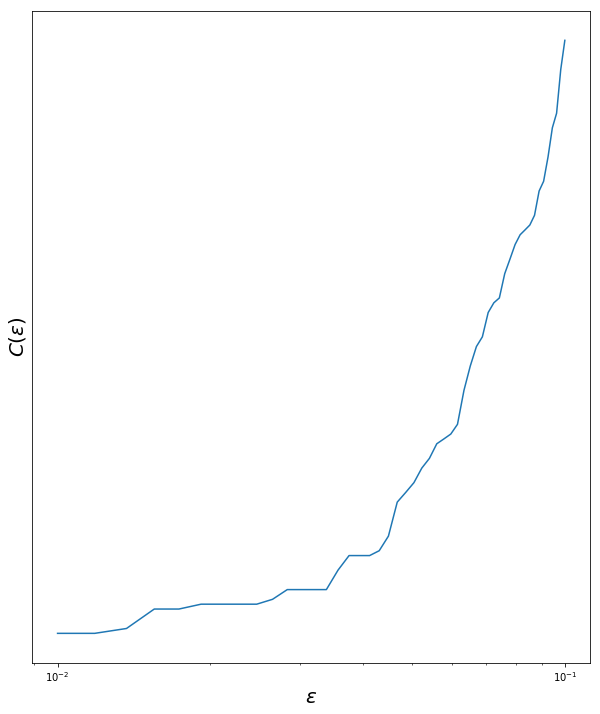

In [127]:
epsilon = np.linspace(1e-2,0.1)

plt.figure(figsize=(10,12))
plt.loglog(epsilon,C_vectorized(epsilon))
plt.yticks()
plt.xlabel('$\epsilon$',fontsize=20)
plt.ylabel('$C(\epsilon)$',fontsize=20)